In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

df=pd.read_csv("./data/training_dataset.csv",low_memory=False)
df.match_date = df.match_date.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))

In [2]:
df

,player1_name,player1_atprank,player1_games,player1_wins,player1_loses,player2_name,player2_atprank,player2_games,player2_wins,player2_loses,match_date,match_location,match_tournament,match_surface,match_odd_player1,match_odd_player2,winner_player1
0,Harrison R.,481,272,117,155,Mager G.,67,59,24,35,2021-01-07,Delray Beach,Delray Beach Open,Hard,1.72,2.00,0
1,Korda S.,26,126,75,51,Kwon S.W.,68,108,53,55,2021-01-07,Delray Beach,Delray Beach Open,Hard,1.72,2.00,1
2,Paul T.,14,204,111,93,Nam J.S.,590,3,0,3,2021-01-07,Delray Beach,Delray Beach Open,Hard,1.12,6.00,1
3,Kecmanovic M.,40,210,107,103,Travaglia S.,1024,81,27,54,2021-01-07,Antalya,Antalya Open,Hard,1.44,2.62,0
4,Bellucci T.,915,380,179,201,Monteiro T.,121,171,69,102,2021-01-07,Delray Beach,Delray Beach Open,Hard,3.00,1.36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7057,Evans D.,30,251,124,127,Tiafoe F.,10,303,158,145,2023-08-05,Washington,Citi Open,Hard,3.75,1.29,1
7058,Griekspoor T.,37,97,47,50,Fritz T.,9,356,205,151,2023-08-06,Washington,Citi Open,Hard,3.50,1.30,1
7059,De Minaur A.,19,272,161,111,Tsitsipas S.,5,390,264,126,2023-08-06,Los Cabos,Los Cabos Open,Hard,3.20,1.36,0
7060,Evans D.,30,251,124,127,Dimitrov G.,20,651,389,262,2023-08-06,Washington,Citi Open,Hard,3.20,1.36,1


In [3]:
df = df.dropna()

In [4]:
from sklearn.model_selection import train_test_split

X = df[["player1_atprank", "player2_atprank","match_date", "match_odd_player1", "match_odd_player2"]]
y = df.winner_player1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [5]:
X_test

,player1_atprank,player2_atprank,match_date,match_odd_player1,match_odd_player2
6417,50,121,2023-05-30,1.36,3.20
1707,104,172,2021-07-26,1.40,3.00
5467,1345,147,2023-02-14,1.44,2.75
6691,109,125,2023-07-03,2.63,1.50
3623,29,4,2022-05-13,3.00,1.40
...,...,...,...,...,...
6091,6,50,2023-04-20,1.29,3.75
5102,1,6,2022-11-04,1.44,2.75
3652,135,118,2022-05-17,2.30,1.61
1614,4,64,2021-07-17,1.14,5.50


In [6]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

X_train_filtered = X_train.drop("match_date",axis=1)
X_test_filtered = X_test.drop("match_date",axis=1)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train_filtered, y_train)

#cross_val_score(dtree, X_test, y_test, cv=10)

y_predict = dtree.predict(X_test_filtered)

accuracy_score(y_predict, y_test)

0.5981507823613087

In [7]:
# ROI return of investment

print("We bet 1€ on all test matches")
df_roi = X_test.copy()
df_roi["y_predict"] = y_predict
df_roi["y_test"]=y_test

money_invested=df_roi.shape[0]
print("money spent:", money_invested,"€")

money_won = 0.0
for index, row in (df_roi[y_predict == y_test]).iterrows():
    if row.y_predict == 0 :
        money_won += row.match_odd_player2
    else:
        money_won += row.match_odd_player1

print("money won:",round(money_won,2),"€")
print("TOTAL:", round(money_won - money_invested, 2),"€")
print("ROI:", round(money_won*100/money_invested,2),"%")

We bet 1€ on all test matches
money spent: 1406 €
money won: 1359.85 €
TOTAL: -46.15 €
ROI: 96.72 %


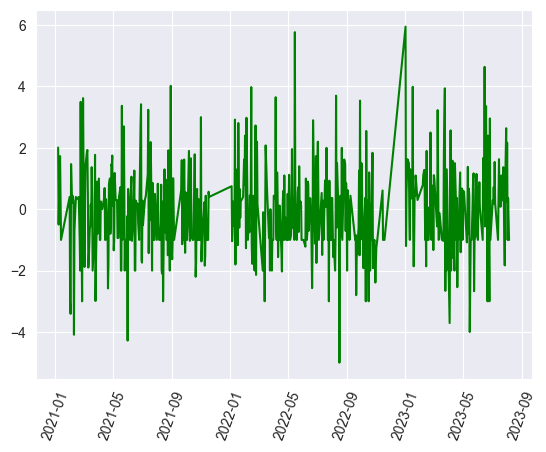

In [8]:
import matplotlib.pyplot as plt

df_roi = df_roi.sort_values(by='match_date')
dates = df_roi.match_date.unique()
data = []

for date in dates :
    money_won = 0.0
    #test = df_roi.at[df_roi.index[0],"match_date"]
    df_roi_filtered = df_roi.loc[df_roi["match_date"]==date]
    #print(df_roi_filtered)
    money_won-=df_roi_filtered.shape[0]

    for index, row in (df_roi_filtered.loc[df_roi_filtered["y_predict"] == df_roi_filtered["y_test"]]).iterrows():
        if row.y_predict == 0 :
            money_won += row.match_odd_player2
        else:
            money_won += row.match_odd_player1

    data.append(money_won)

dates = dates.astype('datetime64[ns]')

plt.plot_date(pd.to_datetime(dates.date, format='%Y-%m-%d'), data, 'g')
plt.xticks(rotation=70)
plt.show()


d = {'date': dates.date, 
     'money_won': data}
roi = pd.DataFrame(data=d)

In [9]:
roi.sort_values(by="money_won")

,date,money_won
373,2022-08-17,-5.00
94,2021-06-01,-4.28
14,2021-02-09,-4.09
516,2023-05-16,-4.00
485,2023-04-04,-3.71
...,...,...
438,2023-01-17,3.99
160,2021-08-30,4.02
536,2023-06-16,4.64
305,2022-05-16,5.77


In [10]:
df_roi

,player1_atprank,player2_atprank,match_date,match_odd_player1,match_odd_player2,y_predict,y_test
6,267,118,2021-01-07,2.50,1.50,0,0
5,25,146,2021-01-07,1.61,2.20,1,1
9,123,157,2021-01-07,1.40,2.75,1,1
8,55,528,2021-01-07,1.50,2.50,1,1
14,695,304,2021-01-08,1.50,2.50,1,1
...,...,...,...,...,...,...,...
7022,101,115,2023-08-02,1.67,2.20,1,0
7000,82,54,2023-08-02,2.20,1.67,0,0
7032,113,115,2023-08-03,2.10,1.73,0,1
7052,9,44,2023-08-04,1.36,3.20,1,1
